In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
from models import *
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, ToTensor, Resize, Normalize

In [2]:
dataset = CIFAR10(root='.', download=True, transform=Compose([Resize(32), ToTensor(), Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]))

Files already downloaded and verified


In [3]:
G = torch.load('cifar10_logan_b/G_25.pth').to('cuda:1').eval()
E = torch.load('cifar10_logan_b/Epost_1.pth').to('cuda:1').eval()

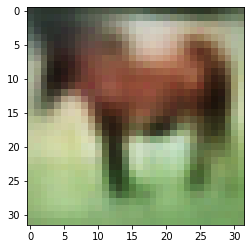

In [4]:
image1 = dataset[7][0].view(1, 3, 32, 32)
latent1 = E(image1.to('cuda:1')).detach()
recon1 = ((G(latent1).cpu().detach())).squeeze().numpy()
plt.imshow((recon1.transpose((1,2,0)) + 1)/2)

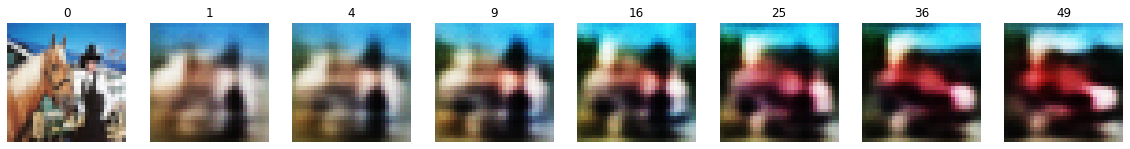

In [11]:
count = 0
plt.gcf().set_size_inches(20, 20)
boot_image = dataset[4241][0].view(1, 3, 32, 32)
plt.subplot(2, 8, 1)
plt.imshow((boot_image.cpu().detach().squeeze().numpy().transpose((1,2,0))+1)/2)
plt.title(count)
plt.axis('off')
boot_latent = E(boot_image.to('cuda:1'))
for t in range(1, 8):
    plt.subplot(2, 8, t+1)
    for _ in range((t-1)*2 + 1):
        boot_image = G(boot_latent).detach()
        boot_latent = E(boot_image.to('cuda:1')).detach()
        count += 1
    plt.imshow((boot_image.cpu().detach().squeeze().numpy().transpose((1,2,0)) + 1)/2)
    plt.title(count)
    plt.axis('off')
plt.savefig('logan-b_8.png', dpi=120, transparent=True, bbox_inches='tight')